jumanpp-batch
=============


**Apply JUMAN++ to batch input in parallel**
<table align="left"><tr>
<td>
  <a href="https://travis-ci.org/kota7/jumanpp-batch">
  <img src="https://travis-ci.org/kota7/jumanpp-batch.svg?branch=master" alt="Travis-CI Status">
  </a>
</td>
<td>
  <a href="https://badge.fury.io/py/jumanpp-batch">
  <img src="https://badge.fury.io/py/jumanpp-batch.svg" alt="PyPI Status">
  </a>
</td>
</tr></table>



This python package facilitates the usage of [juman++](http://nlp.ist.i.kyoto-u.ac.jp/index.php?JUMAN++) software by providing the functionalities to apply the command (1) to batch input (2) and in parallel.


## Requirement

- Python 2.7+, 3.4+
- JUMAN++ 1.0.2, 2.0.0

## Installation

### JUMAN++

#### Version 1

Refer to the official document for the details ([Manual](http://lotus.kuee.kyoto-u.ac.jp/nl-resource/jumanpp/jumanpp-manual-1.01.pdf)).

As of this writing, one can install the v1.0.2 by the following commands:

```bash
wget http://lotus.kuee.kyoto-u.ac.jp/nl-resource/jumanpp/jumanpp-1.02.tar.xz
tar xJvf jumanpp-1.02.tar.xz
cd jumanpp-1.02 && ./configure && make && sudo make install && ../
```

Test:

```bash
jumanpp -v
#JUMAN++ 1.02 
```

```bash
echo "すもももももももものうち" | jumanpp
#すもも すもも すもも 名詞 6 普通名詞 1 * 0 * 0 "代表表記:酸桃/すもも 自動獲得:EN_Wiktionary"
#@ すもも すもも すもも 名詞 6 普通名詞 1 * 0 * 0 "自動獲得:テキスト"
#も も も 助詞 9 副助詞 2 * 0 * 0 NIL
#もも もも もも 名詞 6 普通名詞 1 * 0 * 0 "代表表記:股/もも カテゴリ:動物-部位"
#@ もも もも もも 名詞 6 普通名詞 1 * 0 * 0 "代表表記:桃/もも 漢字読み:訓 カテゴリ:植物;人工物-食べ物 ドメイン:料理・食事"
#も も も 助詞 9 副助詞 2 * 0 * 0 NIL
#もも もも もも 名詞 6 普通名詞 1 * 0 * 0 "代表表記:股/もも カテゴリ:動物-部位"
#@ もも もも もも 名詞 6 普通名詞 1 * 0 * 0 "代表表記:桃/もも 漢字読み:訓 カテゴリ:植物;人工物-食べ物 ドメイン:料理・食事"
#の の の 助詞 9 接続助詞 3 * 0 * 0 NIL
#うち うち うち 名詞 6 副詞的名詞 9 * 0 * 0 "代表表記:うち/うち"
#EOS
```

#### Version 2

Recent versions of JUMAN++ can be installed by the following commands ([Official Repository](https://github.com/ku-nlp/jumanpp)):

```bash
VERSION="2.0.0-rc3"
wget https://github.com/ku-nlp/jumanpp/releases/download/v2.0.0-rc3/jumanpp-$VERSION.tar.xz
tar xfv jumanpp-$VERSION.tar.xz && cd jumanpp-$VERSION
mkdir bld && cd bld && \
  cmake .. -DCMAKE_BUILD_TYPE=Release -DCMAKE_INSTALL_PREFIX="$PWD" && \
  make install
```

The following command let us use the version 2 by calling `jumanpp2`.
Change `/user/local/bin` to any directory within the search path.

```bash
ln -s "$PWD/bin/jumanpp" /usr/local/bin/jumanpp2
```

Test:

```bash
jumanpp2 -v
#uman++ Version: 2.0.0-rc3 / Dictionary: 20190731-356e143 / LM: K:20190430-7d143fb L:20181122-b409be68 F:20171214-9d125cb
```

```bash
echo "おめでとう🎉㊗️23歳かぁ〜若い〜✧" | jumanpp2
#おめでとう おめでとう おめでとう 感動詞 12 * 0 * 0 * 0 "代表表記:おめでとう/おめでとう"
#🎉 🎉 🎉 特殊 1 記号 5 * 0 * 0 "代表表記:🎉/* 絵文字種類:ACTIVITIES:EVENT 絵文字:PARTY_POPPER"
#㊗️ ㊗️ ㊗️ 特殊 1 記号 5 * 0 * 0 "代表表記:㊗️/* 絵文字種類:SYMBOLS:ALPHANUM 絵文字:JAPANESE_CONGRATULATIONS_BUTTON"
#23 23 23 名詞 6 数詞 7 * 0 * 0 "カテゴリ:数量 未知語:数字"
#歳 さい 歳 接尾辞 14 名詞性名詞助数辞 3 * 0 * 0 "代表表記:歳/さい 準内容語"
#かぁ〜 か か 助詞 9 接続助詞 3 * 0 * 0 "非標準表記:DPSL"
#若い わかい 若い 形容詞 3 * 0 イ形容詞アウオ段 18 基本形 2 "代表表記:若い/わかい"
#〜 〜 〜 特殊 1 記号 5 * 0 * 0 NIL
#✧ ✧ ✧ 未定義語 15 その他 1 * 0 * 0 "未知語:その他 品詞推定:特殊"
#EOS
```

### jumanpp-batch library

The library can be downloaded from the [PyPI](https://pypi.org/) repository.

```bash
pip install jumanpp-batch
```

Or install the development version from GitHub.
```bash
git clone https://github.com/kota7/jumanpp-batch.git
pip install -U ./jumanpp-batch
```

In [1]:
# show the library version for running this notebook
!pip list | grep juman

jumanpp-batch      0.1.2.dev0


## Quick use

This library provides two main functions:

- `jumanpp_batch`: Execute juman++ jobs and save the results to file(s)
- `parse_outfiles`: Process the output files

We first apply juman++ software with `jumanpp_batch`, then parse the outputs using `parse_outfiles`.

In [2]:
from jumanpp_batch import jumanpp_batch, parse_outfiles

`jumanpp_batch` takes a list of strings to analyze by JUMAN++. 
The function returns the list of files where the results are saved.

In [3]:
texts = ["すもももももももものうち", "隣の客はよく柿食う客だ", "犬も歩けば棒に当たる"]
outfiles = jumanpp_batch(texts, outfile_base="results/simple_{}.txt", show_progress=True)
print(outfiles)

Completed: 0/3 (0.0%) | 0.0 per sec | ETC: ??? (??? remaining)
All jos are completed.
['results/simple_1.txt']


In [4]:
!cat {outfiles[0]}

すもも すもも すもも 名詞 6 普通名詞 1 * 0 * 0 "代表表記:酸桃/すもも 自動獲得:EN_Wiktionary"
@ すもも すもも すもも 名詞 6 普通名詞 1 * 0 * 0 "自動獲得:テキスト"
も も も 助詞 9 副助詞 2 * 0 * 0 NIL
もも もも もも 名詞 6 普通名詞 1 * 0 * 0 "代表表記:股/もも カテゴリ:動物-部位"
@ もも もも もも 名詞 6 普通名詞 1 * 0 * 0 "代表表記:桃/もも 漢字読み:訓 カテゴリ:植物;人工物-食べ物 ドメイン:料理・食事"
も も も 助詞 9 副助詞 2 * 0 * 0 NIL
もも もも もも 名詞 6 普通名詞 1 * 0 * 0 "代表表記:股/もも カテゴリ:動物-部位"
@ もも もも もも 名詞 6 普通名詞 1 * 0 * 0 "代表表記:桃/もも 漢字読み:訓 カテゴリ:植物;人工物-食べ物 ドメイン:料理・食事"
の の の 助詞 9 接続助詞 3 * 0 * 0 NIL
うち うち うち 名詞 6 副詞的名詞 9 * 0 * 0 "代表表記:うち/うち"
EOS
隣 となり 隣 名詞 6 普通名詞 1 * 0 * 0 "代表表記:隣り/となり カテゴリ:場所-その他"
の の の 助詞 9 接続助詞 3 * 0 * 0 NIL
客 きゃく 客 名詞 6 普通名詞 1 * 0 * 0 "代表表記:客/きゃく 漢字読み:音 カテゴリ:人 ドメイン:家庭・暮らし;ビジネス"
は は は 助詞 9 副助詞 2 * 0 * 0 NIL
よく よく よい 形容詞 3 * 0 イ形容詞アウオ段 18 基本連用形 7 "代表表記:良い/よい 反義:形容詞:悪い/わるい"
柿 かき 柿 名詞 6 普通名詞 1 * 0 * 0 "代表表記:柿/かき カテゴリ:植物 ドメイン:料理・食事"
食う くう 食う 動詞 2 * 0 子音動詞ワ行 12 基本形 2 "代表表記:食う/くう ドメイン:料理・食事"
客 きゃく 客 名詞 6 普通名詞 1 * 0 * 0 "代表表記:客/きゃく 漢字読み:音 カテゴリ:人 ドメイン:家庭・暮らし;ビジネス"
だ だ だ 判定詞 4 * 0 判定詞 25 基本形 2 NIL
EOS
犬 いぬ 犬 名詞 6 普通名詞 1 *

If we supply IDs of the texts to `jumanpp_batch`, then the ID information appears as a commend at the beginning of the analysis result of each text. IDs must have the same length as the input texts.
IDs can help to identify the input text from which the result has been generated.

IDs can be any type, but they are converted to strings during the process.
IDs cannot contain spaces.

*Note: IDs are not strictly needed since the results preserve the order of the input texts.*

In [5]:
texts = ["すもももももももものうち", "隣の客はよく柿食う客だ", "犬も歩けば棒に当たる"]
ids = ["sumomo", "kaki", "inu"]
outfiles = jumanpp_batch(texts, ids, outfile_base="results/simple_{}.txt", show_progress=True)
!cat {outfiles[0]}

Completed: 0/3 (0.0%) | 0.0 per sec | ETC: ??? (??? remaining)
All jos are completed.
# sumomo JUMAN++:1.02
すもも すもも すもも 名詞 6 普通名詞 1 * 0 * 0 "代表表記:酸桃/すもも 自動獲得:EN_Wiktionary"
@ すもも すもも すもも 名詞 6 普通名詞 1 * 0 * 0 "自動獲得:テキスト"
も も も 助詞 9 副助詞 2 * 0 * 0 NIL
もも もも もも 名詞 6 普通名詞 1 * 0 * 0 "代表表記:股/もも カテゴリ:動物-部位"
@ もも もも もも 名詞 6 普通名詞 1 * 0 * 0 "代表表記:桃/もも 漢字読み:訓 カテゴリ:植物;人工物-食べ物 ドメイン:料理・食事"
も も も 助詞 9 副助詞 2 * 0 * 0 NIL
もも もも もも 名詞 6 普通名詞 1 * 0 * 0 "代表表記:股/もも カテゴリ:動物-部位"
@ もも もも もも 名詞 6 普通名詞 1 * 0 * 0 "代表表記:桃/もも 漢字読み:訓 カテゴリ:植物;人工物-食べ物 ドメイン:料理・食事"
の の の 助詞 9 接続助詞 3 * 0 * 0 NIL
うち うち うち 名詞 6 副詞的名詞 9 * 0 * 0 "代表表記:うち/うち"
EOS
# kaki JUMAN++:1.02
隣 となり 隣 名詞 6 普通名詞 1 * 0 * 0 "代表表記:隣り/となり カテゴリ:場所-その他"
の の の 助詞 9 接続助詞 3 * 0 * 0 NIL
客 きゃく 客 名詞 6 普通名詞 1 * 0 * 0 "代表表記:客/きゃく 漢字読み:音 カテゴリ:人 ドメイン:家庭・暮らし;ビジネス"
は は は 助詞 9 副助詞 2 * 0 * 0 NIL
よく よく よい 形容詞 3 * 0 イ形容詞アウオ段 18 基本連用形 7 "代表表記:良い/よい 反義:形容詞:悪い/わるい"
柿 かき 柿 名詞 6 普通名詞 1 * 0 * 0 "代表表記:柿/かき カテゴリ:植物 ドメイン:料理・食事"
食う くう 食う 動詞 2 * 0 子音動詞ワ行 12 基本形 2 "代表表記:食う/くう ドメイン:料理・食事"
客

`parse_outfiles` takes a single or list of output files and returns a generator of `(id, token list)` pairs.
Each token is a [namedtuple](https://docs.python.org/3/library/collections.html#collections.namedtuple) object containing a single line information from JUMAN++ results:

1. `surface` 表層形
1. `reading` 読み
1. `headword` 見出し語
1. `pos` 品詞大分類
1. `pos_id` 品詞大分類 ID
1. `pos2` 品詞細分類
1. `pos2_id` 品詞細分類 ID
1. `infltype` 活用型
1. `infltype_id` 活用型 ID
1. `inflform` 活用形
1. `inflform_id` 活用形 ID
1. `info` 意味情報
1. `is_alternative`

The first 12 information corresponds to the line information.
The last one `is_alternative` indicates that this line shows an alternative candidate (i.e. the line starts with '@').
By default, alternative tokens are omitted in the generator created by `parse_outfiles`.
Set `skip_alternatives=False` to show them.

In [6]:
for id_, tokens in parse_outfiles(outfiles):
    print(id_)
    print(tokens)
    print("***")

sumomo
[JumanppToken(surface='すもも', reading='すもも', headword='すもも', pos='名詞', pos_id='6', pos2='普通名詞', pos2_id='1', infltype='*', infltype_id='0', inflform='*', inflform_id='0', info='代表表記:酸桃/すもも 自動獲得:EN_Wiktionary', is_alternative=False), JumanppToken(surface='も', reading='も', headword='も', pos='助詞', pos_id='9', pos2='副助詞', pos2_id='2', infltype='*', infltype_id='0', inflform='*', inflform_id='0', info='NIL', is_alternative=False), JumanppToken(surface='もも', reading='もも', headword='もも', pos='名詞', pos_id='6', pos2='普通名詞', pos2_id='1', infltype='*', infltype_id='0', inflform='*', inflform_id='0', info='代表表記:股/もも カテゴリ:動物-部位', is_alternative=False), JumanppToken(surface='も', reading='も', headword='も', pos='助詞', pos_id='9', pos2='副助詞', pos2_id='2', infltype='*', infltype_id='0', inflform='*', inflform_id='0', info='NIL', is_alternative=False), JumanppToken(surface='もも', reading='もも', headword='もも', pos='名詞', pos_id='6', pos2='普通名詞', pos2_id='1', infltype='*', infltype_id='0', inflform='*', 

There are several options to configure the parsing outputs:
- `format_func`: Function to convert token
- `pos_filter`: Specify the part-of-speeches to include
- `filter_func`: Function to determine which token should be kept

In [7]:
for id_, tokens in parse_outfiles(outfiles,
                                  format_func=lambda x: "{} ({})".format(x.headword, x.reading),
                                  pos_filter=("名詞", "動詞"),
                                  filter_func=lambda x: x.surface != "犬"):
    print(id_)
    print(tokens)
    print("***")

sumomo
['すもも (すもも)', 'もも (もも)', 'もも (もも)', 'うち (うち)']
***
kaki
['隣 (となり)', '客 (きゃく)', '柿 (かき)', '食う (くう)', '客 (きゃく)']
***
inu
['歩く (あるけば)', '棒 (ぼう)', '当たる (あたる)']
***


### Note on JUMAN++ 2.0

We can use different version of JUMAN++ by giving the command name as `jumanpp_command`.

In [8]:
texts = ["すもももももももものうち", "おめでとう🎉㊗️23歳かぁ〜若い〜✧"]
ids = ["sumomo", "emoji"]
outfiles = jumanpp_batch(texts, ids, jumanpp_command="jumanpp2",
                         outfile_base="results/simple_{}.txt", show_progress=True)
!cat {outfiles[0]}

Completed: 0/2 (0.0%) | 0.0 per sec | ETC: ??? (??? remaining)
All jos are completed.
# sumomo
すもも すもも すもも 名詞 6 普通名詞 1 * 0 * 0 "自動獲得:テキスト"
@ すもも すもも すもも 名詞 6 普通名詞 1 * 0 * 0 "代表表記:酸桃/すもも 自動獲得:EN_Wiktionary"
も も も 助詞 9 副助詞 2 * 0 * 0 NIL
もも もも もも 名詞 6 普通名詞 1 * 0 * 0 "代表表記:桃/もも ドメイン:料理・食事 カテゴリ:植物;人工物-食べ物 漢字読み:訓"
@ もも もも もも 名詞 6 普通名詞 1 * 0 * 0 "代表表記:股/もも カテゴリ:動物-部位"
も も も 助詞 9 副助詞 2 * 0 * 0 NIL
もも もも もも 名詞 6 普通名詞 1 * 0 * 0 "代表表記:桃/もも ドメイン:料理・食事 カテゴリ:植物;人工物-食べ物 漢字読み:訓"
@ もも もも もも 名詞 6 普通名詞 1 * 0 * 0 "代表表記:股/もも カテゴリ:動物-部位"
の の の 助詞 9 接続助詞 3 * 0 * 0 NIL
うち うち うち 名詞 6 副詞的名詞 9 * 0 * 0 "代表表記:うち/うち"
EOS
# emoji
おめでとう おめでとう おめでとう 感動詞 12 * 0 * 0 * 0 "代表表記:おめでとう/おめでとう"
🎉 🎉 🎉 特殊 1 記号 5 * 0 * 0 "代表表記:🎉/* 絵文字種類:ACTIVITIES:EVENT 絵文字:PARTY_POPPER"
㊗️ ㊗️ ㊗️ 特殊 1 記号 5 * 0 * 0 "代表表記:㊗️/* 絵文字種類:SYMBOLS:ALPHANUM 絵文字:JAPANESE_CONGRATULATIONS_BUTTON"
２３ ２３ ２３ 名詞 6 数詞 7 * 0 * 0 "カテゴリ:数量 未知語:数字"
歳 さい 歳 接尾辞 14 名詞性名詞助数辞 3 * 0 * 0 "代表表記:歳/さい 準内容語"
かぁ〜 か か 助詞 9 接続助詞 3 * 0 * 0 "非標準表記:DPSL"
若い わかい 若い 形容詞 3 * 0 イ形容詞アウオ段 

In [9]:
for id_, tokens in parse_outfiles(outfiles,
                                  format_func=lambda x: "{} ({})".format(x.headword, x.reading)):
    print(id_)
    print(tokens)
    print("***")

sumomo
['すもも (すもも)', 'も (も)', 'もも (もも)', 'も (も)', 'もも (もも)', 'の (の)', 'うち (うち)']
***
emoji
['おめでとう (おめでとう)', '🎉 (🎉)', '㊗️ (㊗️)', '２３ (２３)', '歳 (さい)', 'か (か)', '若い (わかい)', '〜 (〜)', '✧ (✧)']
***


## Run JUMAN++ in parallel

Set `num_procs` option (default: 1) for `jumanpp_batch` to specify the number of concurrent processes to run.
The input texts are split into chunks of roughly equal size and fed into separate JUMAN++ jobs.

In [10]:
%%time
# single process
texts = ["すもももももももものうち", "隣の客はよく柿食う客だ", "犬も歩けば棒に当たる"] * 1000
outfiles1 = jumanpp_batch(texts, num_procs=1, 
                          outfile_base="results/p1_{}.txt", show_progress=True)
print(outfiles1)

Completed: 0/3000 (0.0%) | 0.0 per sec | ETC: ??? (??? remaining)
Completed: 612/3000 (20.4%) | 61.2 per sec | ETC: 2020-10-16 22:55:41 (0:00:39 remaining)
Completed: 1239/3000 (41.3%) | 62.0 per sec | ETC: 2020-10-16 22:55:40 (0:00:28 remaining)
Completed: 1851/3000 (61.7%) | 61.7 per sec | ETC: 2020-10-16 22:55:41 (0:00:19 remaining)
Completed: 2466/3000 (82.2%) | 61.6 per sec | ETC: 2020-10-16 22:55:41 (0:00:09 remaining)
All jos are completed.
['results/p1_1.txt']
CPU times: user 56.9 ms, sys: 9.1 ms, total: 66 ms
Wall time: 50.1 s


In [11]:
# check the number of "EOS" in the files
for f in outfiles1:
    ct = 0
    with open(f) as fin:
        for line in fin:
            if line.strip() == "EOS":
                ct += 1
    print("'{}': {} EOS".format(f, ct))

'results/p1_1.txt': 3000 EOS


In [12]:
%%time
# mutiple process
texts = ["すもももももももものうち", "隣の客はよく柿食う客だ", "犬も歩けば棒に当たる"] * 1000
outfiles2 = jumanpp_batch(texts, num_procs=4, 
                          outfile_base="results/p4_{}.txt", show_progress=True)
print(outfiles)

Completed: 0/3000 (0.0%) | 0.0 per sec | ETC: ??? (??? remaining)
Completed: 1986/3000 (66.2%) | 198.6 per sec | ETC: 2020-10-16 22:55:57 (0:00:05 remaining)
All jos are completed.
['results/simple_1.txt']
CPU times: user 39.6 ms, sys: 20.2 ms, total: 59.7 ms
Wall time: 20.1 s


In [13]:
# check the number of "EOS" in the files
for f in outfiles2:
    ct = 0
    with open(f) as fin:
        for line in fin:
            if line.strip() == "EOS":
                ct += 1
    print("'{}': {} EOS".format(f, ct))

'results/p4_1.txt': 750 EOS
'results/p4_2.txt': 750 EOS
'results/p4_3.txt': 750 EOS
'results/p4_4.txt': 750 EOS


In [14]:
# proof that the outputs are identical
o1 = ""
for path in outfiles1:
    with open(path, "r") as f:
        o1 += f.read()

o2 = ""
for path in outfiles2:
    with open(path, "r") as f:
        o2 += f.read()

print(o1==o2)

True


In [15]:
# time comparison
import os
from datetime import datetime

texts = ["すもももももももものうち", "隣の客はよく柿食う客だ", "犬も歩けば棒に当たる"] * 5000
times = {}
for np in range(1, 9):
    print("Start with num procs:", np)
    t1 = datetime.now()
    jumanpp_batch(texts, num_procs=np, 
                  outfile_base="results/p%s_{}.txt" % np, show_progress=False)
    t2 = datetime.now()
    times[np] = (t2 - t1).seconds

Start with num procs: 1
Start with num procs: 2
Start with num procs: 3
Start with num procs: 4
Start with num procs: 5
Start with num procs: 6
Start with num procs: 7
Start with num procs: 8


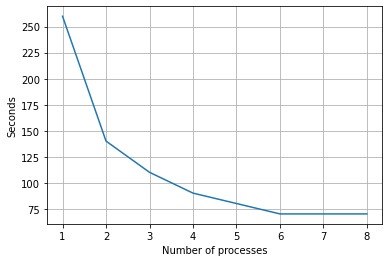

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
num_procs = list(times.keys())
time_elapsed = [times[np] for np in num_procs]
ax.plot(num_procs, time_elapsed)
ax.grid()
ax.set_xlabel("Number of processes")
ax.set_ylabel("Seconds")
None